In [1]:
# Step 1: Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Step 3: Normalize and reshape the image data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

In [4]:
# Step 4: Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Step 5: Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [6]:
# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Step 7: Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=5, batch_size=128, verbose=2)


Epoch 1/5
469/469 - 14s - loss: 0.2090 - accuracy: 0.9384 - val_loss: 0.0578 - val_accuracy: 0.9819 - 14s/epoch - 29ms/step
Epoch 2/5
469/469 - 13s - loss: 0.0541 - accuracy: 0.9838 - val_loss: 0.0422 - val_accuracy: 0.9854 - 13s/epoch - 29ms/step
Epoch 3/5
469/469 - 14s - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.0361 - val_accuracy: 0.9878 - 14s/epoch - 29ms/step
Epoch 4/5
469/469 - 17s - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.0408 - val_accuracy: 0.9864 - 17s/epoch - 37ms/step
Epoch 5/5
469/469 - 14s - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0343 - val_accuracy: 0.9887 - 14s/epoch - 30ms/step


In [8]:
# Step 8: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")


Test Accuracy: 0.9887


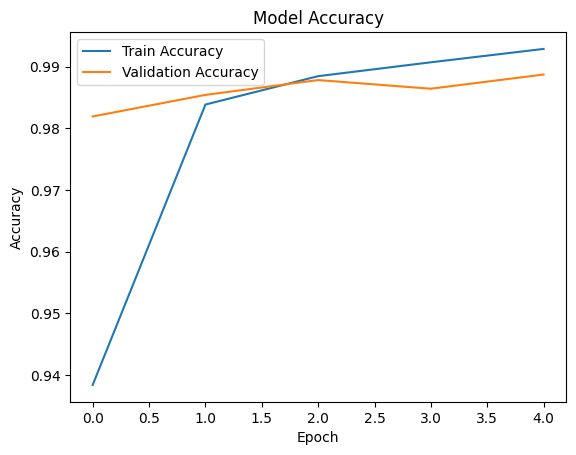

1/1 [==============================] - 0s 109ms/step

Predicted labels: [7 2 1 0 4 1 4 9 5 9]
Actual labels:    [7 2 1 0 4 1 4 9 5 9]


In [9]:
# Step 9: Display training accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predicting first 10 test images
predictions = model.predict(x_test[:10])
predicted_labels = predictions.argmax(axis=1)
actual_labels = y_test[:10].argmax(axis=1)

print("\nPredicted labels:", predicted_labels)
print("Actual labels:   ", actual_labels)